# Projeto Final - Análise dos Dados do Titanic

O Conjunto de dados foi o "titanic-data-6.csv".
Esse conjunto de dados tem por informação alguns dados dos que foram sobrevivente ou mortos.

Foram respondidas as seguintes perguntas:

   1 - Entre as pessoas que sobreviveram e as pessoas mortas, quais tiveram um maior número?<br>
   2 - Qual grupo por faixa etária, teve a maior taxa de sobrevivência?<br>
   3 - Entre as classes que haviam no Titanic, qual sofreu maior perda?<br>
   4 - Por sexo, qual teve maior perda significativa?

Breve Descrição:
    
Depois de carregar os dados do csv, foi possível observar os dados e assim constatei que os campos
(Sobrevivente, Idade, ClasseBilhete, Sexo), seriam ideais para identificar os tipos de pessoas que tenham 
morrido ou sobrevivido ao infeliz acidente.

Limpezas:
    
Foi verificado que o campo de ano contia valores nulos e com isso, todo valor nulo foi ajustado a média entre eles. Havia também registros com o tipo float e o mesmo foi convertido para inteiro;
        
Os campos foram renomeados;
    
Verificado se existem registros duplicados;

Uma nova coluna para foi criada para categorizar a faíxa etária;
    
O campo Sexo foi ajustado para male == M e female == F.

Gráficos:


Estes foram feitos todos com gráfico de barras e tentando ao máximo trazer ao analista, maior clareza em relação aos dados utilizados e respondendo de forma simples e objetiva as perguntas que foram sugeridas.

Sites de Referências:

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html<br>
https://matplotlib.org/users/pyplot_tutorial.html<br>
https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining<br>
https://stackoverflow.com/questions/44743109/plotting-average-by-each-genres-pandas<br>
https://stackoverflow.com/questions/31494870/pandas-dataframe-no-numeric-data-to-plot-error<br>
https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it<br>
https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy<br>
https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra<br>
https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas<br>
https://www.kaggle.com/sashr07/kaggle-titanic-tutorial<br>
https://www.datacamp.com/community/tutorials/15-easy-solutions-data-frame-problems-r<br>
https://github.com/pandas-dev/pandas/issues/4742<br>
https://www.reddit.com/r/learnpython/comments/4zn20y/how_to_convert_sparse_pandas_dataframe_with_nan/<br>
https://www.ritchieng.com/pandas-changing-datatype/<br>
http://pbpython.com/pandas_dtypes.html<br>
http://dni-institute.in/blogs/tag/pandas-convert-float-to-int/<br>
https://www.peterbe.com/plog/interesting-casting-in-python<br>
https://realpython.com/python-matplotlib-guide/<br>
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python<br>

# Tratamento dos Dados

In [106]:
# importação dos módulos
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [107]:
# Cria DataFrame
df_titanic = pd.read_csv('titanic-data-6.csv')

In [108]:
# Mostra as caracteristicas do DataFrame
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [109]:
# Verificação da quantidade de valores nulos para a coluna Age
df_titanic.Age.isna().sum()

177

In [110]:
'''
Para o campo Age, foi verificado que existem 177 registros nulos e dessa forma será utilizada a técnica Average imputation.
Nesta técnica utilizamos o valor médio da coluna (para as observações que possuem valor) e atribuímos este valor para as
observações que possuem missing.
Ref.: https://bit.ly/2Wb73s5

Obs: A página https://bit.ly/2ROdEKf saiu do ar e o site está em construção.

Dessa forma, ao verificar os valores nulos do campo Age, é efetuado um cálculo de média dos valores não nulos desse campo
e também a conversão do campo para inteiro.
'''

# Tratamento do campo Age
df_titanic.Age = df_titanic.Age.fillna(df_titanic['Age'].mean()).astype('int64')

# Verifica o resultado
df_titanic.Age.unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74], dtype=int64)

In [111]:
# Nova verificação dos campos
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


In [112]:
# Criação de variável com novos nomes de campos para substituição no dataframe
colunas = ['ID'
           ,'Sobrevivente'
           ,'Classe_Bilhete'
           ,'Nome'
           ,'Sexo'
           ,'Idade'
           ,'QtIrmaosConj'
           ,'QtPaisFilhos'
           ,'Ticket'
           ,'Tarifa'
           ,'Cabine'
           ,'PortoEmbarque'
          ]

# Renomear as colunas
df_titanic.set_axis(colunas
                    ,axis=1
                    ,inplace=True
                   )

In [113]:
# Verificar se existem registros duplicados
df_titanic.duplicated().sum()

0

Criação da coluna faixa_etária para classficar por idade entre os seguintes inteválos:<br>
    De 0 a 14 = Criança <br>
    De 15 a 50 = Adulto <br>
    De 51 a 150 = Idoso <br>

In [114]:
# Criação das variáveis para o invervalo e sua respectiva categoria
intervalos = [0, 14, 50, 150]
descricao = ["criancas", "adultos", "idosos"]

# Utilização da função cut (https://bit.ly/2TdvEuv) para categorizar cada idade em sua faixa etária
df_titanic["faixa_etaria"] = pd.cut(x = df_titanic.Idade
                                    ,bins = intervalos
                                    ,labels = descricao
                                   )

In [115]:
# Ajuste no campo Sexo
Sexo = {'male': 'M','female': 'F'}
df_titanic.Sexo = [Sexo[item] for item in df_titanic.Sexo]

In [117]:
# Mostrar os resultados
df_titanic.head()

,ID,Sobrevivente,Classe_Bilhete,Nome,Sexo,Idade,QtIrmaosConj,QtPaisFilhos,Ticket,Tarifa,Cabine,PortoEmbarque,faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",M,22,1,0,A/5 21171,7.2500,NaN,S,adultos
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38,1,0,PC 17599,71.2833,C85,C,adultos
2,3,1,3,"Heikkinen, Miss. Laina",F,26,0,0,STON/O2. 3101282,7.9250,NaN,S,adultos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35,1,0,113803,53.1000,C123,S,adultos
4,5,0,3,"Allen, Mr. William Henry",M,35,0,0,373450,8.0500,NaN,S,adultos


# Perguntas e Respostas:

### Entre os sobrevivêntes e os mortos, quais tiveram a maior taxa?

Total de Sobreviventes: 342
Total de Mortos: 549


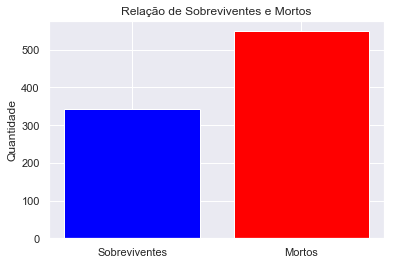

In [118]:
# A utilização do parâmetro shape[0], foi para buscar o total de linhas paras o grupo de sobreviventes e mortos.
# Variáveis foram criados para maior controle e organização

# Declaração de Variáveis
qt_sobreviventes = df_titanic.query('Sobrevivente == "1"')['Sobrevivente'].shape[0]
qt_mortos = df_titanic.query('Sobrevivente == "0"')['Sobrevivente'].shape[0]
label = ['Sobreviventes', 'Mortos']

# Retorna os totais
print("Total de Sobreviventes: " + str(qt_sobreviventes)
      + '\n'
      + "Total de Mortos: " + str(qt_mortos))

# A utilização da função arange, poderia ser substituida por uma lista com duas posições ex.: [0,1]
tamanho = np.arange(2)

# Criação do plot para melhor visualização dos dados
BarSobreviventes = plt.bar(0
                           ,qt_sobreviventes
                           ,color='blue'
                           ,label='sobreviventes'
                          )

BarMortos = plt.bar(1
                    ,qt_mortos
                    ,color='red'
                    ,label='Mortos'
                   )

plt.ylabel('Quantidade')
plt.title('Relação de Sobreviventes e Mortos')
plt.xticks(tamanho, label)
plt.show();

O gráfico acima demonstra que a quantidade de pessoas mortas (549) acabou sendo maior que a quantidade de pessoas que sobreviveram (342).

Para as pessoas que morreram, infelizmente não é possível obter a informação sobre o tipo de morte, que na ocasião poderia ser por afogamento, explosão ou até mesmo de hipotermia.

### Qual faixa etária com a idade teve a maior taxa de sobrevivência?

In [119]:
# Retorna o quantidade somente dos sobreviventes por faixa etária
df_titanic.query('Sobrevivente == "1"').groupby(["faixa_etaria","Sobrevivente"])["faixa_etaria"].size().unstack()

Sobrevivente,1
faixa_etaria,
criancas,38
adultos,275
idosos,22


In [120]:
# Retorna o quantidade somente dos mortos por faixa etária
df_titanic.query('Sobrevivente == "0"').groupby(["faixa_etaria","Sobrevivente"])["faixa_etaria"].size().unstack()

Sobrevivente,0
faixa_etaria,
criancas,33
adultos,474
idosos,42


Para o grupo dos sobreviventes, observa-se que os adultos tiveram um índice maior de sobrevivência se somado com as crianças e idosos.

E para o grupo dos mortos, não difere do grupo acima, porém sendo muito maior o índice de mortes na faixa adulta que o dos sobreviventes na mesma faixa etária.

No gráfico que será apresentado logo abaixo, é possível observar de forma mais clara o que fora descrito em relação aos dois grupos. 

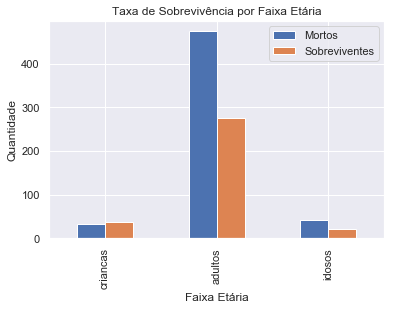

In [121]:
'''
Utilizando o DataFrame df_titanic, foi possível utilzar a groupby pelos campos faixa_etária e sobrevivente, retornando
a descrição da faixa etária.

O .size() é um método interno de objetos DataFrameGroupBy, na verdade, retorna um objeto de série com os tamanhos de grupo
e não um DataFrame. Ref.: https://bit.ly/2B2engC

O .unstack() é um método que transforma valores de índice em nomes de colunas. Ref.: https://bit.ly/2FYOrpB
'''

# Agrupa pelos campos (faixa_etaria e sobrevivente) e retorna um gráfico de barra.
df_titanic.groupby(["faixa_etaria","Sobrevivente"])["faixa_etaria"].size().unstack().plot.bar()
plt.title("Taxa de Sobrevivência por Faixa Etária")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show();

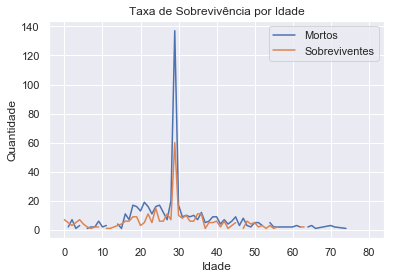

In [122]:
# Gráfico complementar com informações por idade
df_titanic.groupby(["Idade","Sobrevivente"])["Idade"].size().unstack().plot.line()
plt.title("Taxa de Sobrevivência por Idade")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show();

No gráfico acima, é possível observar que o índice de sobrevivência da idade de 30 anos é menor que o índice de mortes nessa mesma idade.

### Entre as classes que haviam no Titanic, qual sofreu maior perda?

In [123]:
# Retorna o quantidade pela coluna Classe_Bilhete
df_titanic.groupby(["Classe_Bilhete","Sobrevivente"])["Classe_Bilhete"].count().unstack()

Sobrevivente,0,1
Classe_Bilhete,,
1,80,136
2,97,87
3,372,119


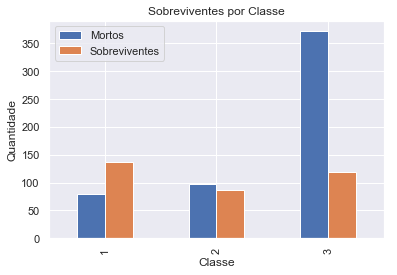

In [124]:
# Retorna o gráfico de barra as informações entre os sobreviventes da primeira, segunda e terceira classe.
df_titanic.groupby(["Classe_Bilhete","Sobrevivente"])["Classe_Bilhete"].size().unstack().plot.bar()
plt.title("Sobreviventes por Classe")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show();

Seguem algumas observações em relação ao gráfico acima:<br> <br>
    1- Na primeira classe, a quantidade de sobreviventes é maior que a quantidade de mortos de sua própria classe e também das demais.<br>Na primeira classe, a quantidade de mortos é menor que qualquer outra classe;<br> <br>
    2- Na segunda classe, a quantidade de mortos supera a da primeira, porém a de sobreviventes fica abaixo não só dela mesma em comparação aos mortos quanto das demais;<br> <br>
    3- E por fim, para a terceira classe, o total de mortos supera em muito a quantidade das classes já mensionadas. Isso leva a refletir sobre serem eles os primeiros a sentirem o impacto da colisão.

### Por sexo, qual teve maior perda significativa?

In [125]:
# Retorna os totais por sexo
df_titanic.groupby(["Sexo","Sobrevivente"])["Sexo"].size().unstack()

Sobrevivente,0,1
Sexo,,
F,81,233
M,468,109


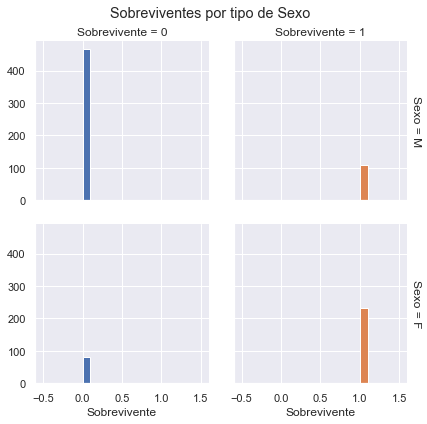

In [126]:
# Gráfico com os totais comparando os sexos
titanic = sns.FacetGrid(df_titanic, row='Sexo', col="Sobrevivente", margin_titles=True, hue="Sobrevivente")
titanic.map(plt.hist, "Sobrevivente")
plt.subplots_adjust(top=0.9)
titanic.fig.suptitle('Sobreviventes por tipo de Sexo')
plt.show();

Por fim, esse gráfico demonstra que as mulheres tiveram mais oportunidade de sobreviver que os homens, sendo que estes tiveram uma taxa maior de mortos e menor de sobreviventes.

# Conclusão

Um dos piores desastres marítimos da história, teve início na noite de 14 de abril e terminou na manhã de 15 de abril de 1912, o luxuoso transatlântico RMS Titanic foi ao fundo do mar após colidir com um iceberg no Oceano Atlântico. Estimam-se 2.224 pessoas a bordo com mais de 1.5oo mortos. Fonte(https://bit.ly/1MRWT26).

O arquivo utilizado contém 891 registros, no qual dentre ele há informações relevantes sobre os sobreviventes e os que morreram.
Estes questionamentos foram respondidos utilizando métodos de visualização mais claras, para que a compreensão do que aconteceu fosse mais simples

Seguem algumas observações referentes aos dados:

1.	No arquivo existem 891 registros e dentre eles, 342 foram sobreviventes contra 549 que morreram;<br><br>

2.	Em relação a faixa etária, os adultos sobreviventes tiveram o total de 275 pessoas que é um valor bem menor que estando na mesma faixa, os mortos foram 474. Já em relação a idade, morreram mais adultos entre 14 e 50 anos com um pico nos 30 anos que chega aproximadamente a umas 140 pessoas. Em relação aos sobreviventes, as informações que correspondem a adultos e idade entre 14 a 50 anos, são bem aproximadas, exceto pelo pico dos 30 anos que é menor, chegando a 60 pessoas;<br><br>

3.	Em se tratando dos dados referentes a classes, a primeira classe teve 80 mortos e 136 sobreviventes, a segunda classe teve 97 mortos e 87 sobreviventes e por fim, a terceira classe teve 372 mortos e 119 sobreviventes. Logo, a terceira classe foi a que mais obteve um número significativo de mortos.<br><br>

4.	Com a regra de mulheres e crianças primeiro, os homens já ficam com um índice muito superior de mortos com um total de 468 contra 81 das mulheres e se tratando dos sobreviventes, os homens tiveram 109 e as mulheres 233 no total.<br><br>

É importante ressaltar que as análises feitas não são de fato precisas, pois em nenhum momento houveram testes estatísticos para trazer veracidade ao que fora apresentado e sim uma alusão as limitações dos dados que foram trabalhados.

Em um contexto mais amplo, houveram ajustes que de forma substancial influenciam no resultado. Um deles foi a substituição dos valores nulos na coluna de idade e também o caráter técnico que ainda não abrange um maior conhecimento para conseguir extrair informações ainda mais consistentes.
